In [57]:
import warnings
warnings.filterwarnings("ignore")

## Lesson 1

1\. Briefly describe in writing how kNN algorithm works

To classify each of the objects of the test sample, the following operations must be performed sequentially:
* Calculate the distance to each of the objects in the training sample
* Select k objects of the training sample, the distance to which is minimal
* The class of the object being classified is the class most commonly found among the k nearest neighbors

2\. Describe how to deal with ties when more then one class appear in the neighborhood with identical frequencies.

It is a weekness of this algorithm. I guess that this two classes could be merged in one, or may be change significant variables for this algo.

## Lesson 2

4\. Describe in writing how the confusion matrix is computed in multi-class classification

For binary

![image](https://hranalytic.ru/wp-content/uploads/2019/06/https-cdn-images-1-medium-com-max-1600-17eyyla6.png)

For multiclass

|Предсказанный класс| Класс 1 (C₁)|	Класс 2 (C₂)|Класс 3 (C₃)|
|-------------------|-------------|-------------|------------|
|(P₁)	|T₁ 	|F₁₂	|F₁₃|
|(P₂)	|F₂₁	|T₂ 	|F₂₃|
|(P₃)	|F₃₁	|F₃₂	|T₃|

7\. Download dataset from file "point-clouds-3.csv" that can be found in the repository "https://raw.githubusercontent.com/kupav/data-sc-intro/main/data/". This file contains labeled data. Inspect the data and find the size of the dataset, number of classes, number of instances of each class. Is this dataset well balanced? Using scikit-learn library, create kNN classifier for it. Evaluate the model using an appropriate metrics. Try different $k$, find the best one. Compute the final score for your model.

In [58]:
!pip install scikit-learn

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [60]:
df = pd.read_csv("data/point-clouds-3.csv")

In [61]:
df.head()

,x,y,class
0,-0.799419,-0.129593,0.0
1,0.885987,-0.412661,0.0
2,0.298744,-0.832983,0.0
3,-0.403727,0.692558,0.0
4,0.591803,-0.794811,0.0


In [62]:
df.describe()

,x,y,class
count,200.000000,200.000000,200.000000
mean,0.015690,0.006183,0.250000
std,0.639738,0.641313,0.434099
min,-1.274467,-1.261438,0.000000
25%,-0.483257,-0.532142,0.000000
50%,0.049938,-0.026894,0.000000
75%,0.526391,0.585707,0.250000
max,1.113933,1.255873,1.000000


In [63]:
df['class'].unique()

array([0., 1.])

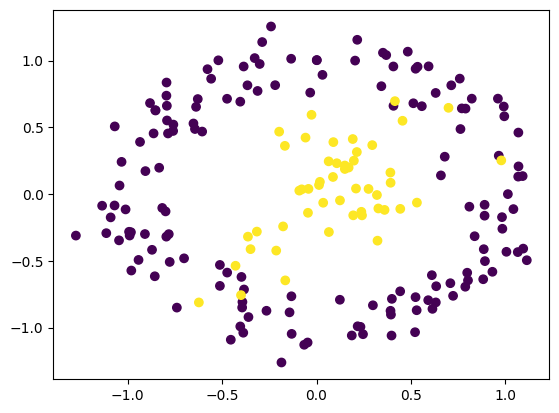

In [64]:
fig, ax = plt.subplots()
ax.scatter(df['x'], df['y'], c=df['class']);

In [65]:
X = df.drop('class', axis=1)
y = df['class']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred = knn.predict(X)

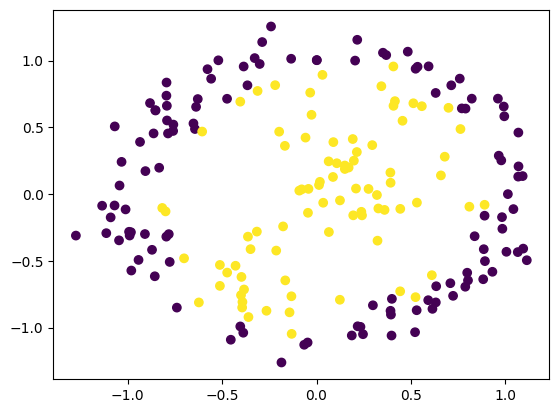

In [67]:
fig, ax = plt.subplots()
ax.scatter(X['x'], X['y'], c=y_pred);